In [3]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

In [6]:
# Data Loading
data_file = '/Users/matthewoladiran/Downloads/LagdoDam/data/processed/merged_data.csv' 
data = pd.read_csv(data_file)

# Display the first few rows of the data
data.head()

,precipitation_mm,dam_discharge_(m_/s),flood_severity,affected_regions,Year_x,State,GDP Loss (Billion),Agricultural Damage (Hectares),Infrastructure Damage (Billion),Food Security Impact (%),...,Rainfall (mm),Benue River Discharge (m³/s),Notification Days Before Release,Dasin Hausa Dam Status,surface_area_m3s,volume_variation_m3s,water_level_m,year,month,day
0,0.0,1976.74,No flood,"Benue, Kogi",2022.0,Bayelsa,150.0,50000.0,20.0,99.0,...,1309.0,12893.0,9.0,Not started,441.31,0.85742,211.813,1982,1,1
1,0.0,1650.34,No flood,"Benue, Kogi",2022.0,Bayelsa,150.0,50000.0,20.0,99.0,...,1309.0,12893.0,9.0,Not started,441.31,0.85742,211.813,1982,1,2
2,0.0,1354.01,No flood,"Benue, Kogi",2022.0,Bayelsa,150.0,50000.0,20.0,99.0,...,1309.0,12893.0,9.0,Not started,441.31,0.85742,211.813,1982,1,3
3,0.0,1496.94,No flood,"Benue, Kogi",2022.0,Bayelsa,150.0,50000.0,20.0,99.0,...,1309.0,12893.0,9.0,Not started,441.31,0.85742,211.813,1982,1,4
4,0.0,1519.02,No flood,"Benue, Kogi",2022.0,Bayelsa,150.0,50000.0,20.0,99.0,...,1309.0,12893.0,9.0,Not started,441.31,0.85742,211.813,1982,1,5


In [7]:
# Checking the data types and missing values
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23834 entries, 0 to 23833
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   precipitation_mm                  23834 non-null  float64
 1   dam_discharge_(m_/s)              23834 non-null  float64
 2   flood_severity                    23834 non-null  object 
 3   affected_regions                  23834 non-null  object 
 4   Year_x                            23834 non-null  float64
 5   State                             23834 non-null  object 
 6   GDP Loss (Billion)                23834 non-null  float64
 7   Agricultural Damage (Hectares)    23834 non-null  float64
 8   Infrastructure Damage (Billion)   23834 non-null  float64
 9   Food Security Impact (%)          23834 non-null  float64
 10  Year_y                            23834 non-null  float64
 11  Month(s) of Occurrence            23834 non-null  object 
 12  Floo

In [10]:
# Combine Year, Month, and Day columns to create a 'datetime' column
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day']])

# Now, set 'datetime' as the index
data.set_index('datetime', inplace=True)

# Display the first few rows to check the datetime conversion
data.head()

,precipitation_mm,dam_discharge_(m_/s),flood_severity,affected_regions,Year_x,State,GDP Loss (Billion),Agricultural Damage (Hectares),Infrastructure Damage (Billion),Food Security Impact (%),...,Rainfall (mm),Benue River Discharge (m³/s),Notification Days Before Release,Dasin Hausa Dam Status,surface_area_m3s,volume_variation_m3s,water_level_m,year,month,day
datetime,,,,,,,,,,,,,,,,,,,,,
1982-01-01,0.0,1976.74,No flood,"Benue, Kogi",2022.0,Bayelsa,150.0,50000.0,20.0,99.0,...,1309.0,12893.0,9.0,Not started,441.31,0.85742,211.813,1982,1,1
1982-01-02,0.0,1650.34,No flood,"Benue, Kogi",2022.0,Bayelsa,150.0,50000.0,20.0,99.0,...,1309.0,12893.0,9.0,Not started,441.31,0.85742,211.813,1982,1,2
1982-01-03,0.0,1354.01,No flood,"Benue, Kogi",2022.0,Bayelsa,150.0,50000.0,20.0,99.0,...,1309.0,12893.0,9.0,Not started,441.31,0.85742,211.813,1982,1,3
1982-01-04,0.0,1496.94,No flood,"Benue, Kogi",2022.0,Bayelsa,150.0,50000.0,20.0,99.0,...,1309.0,12893.0,9.0,Not started,441.31,0.85742,211.813,1982,1,4
1982-01-05,0.0,1519.02,No flood,"Benue, Kogi",2022.0,Bayelsa,150.0,50000.0,20.0,99.0,...,1309.0,12893.0,9.0,Not started,441.31,0.85742,211.813,1982,1,5


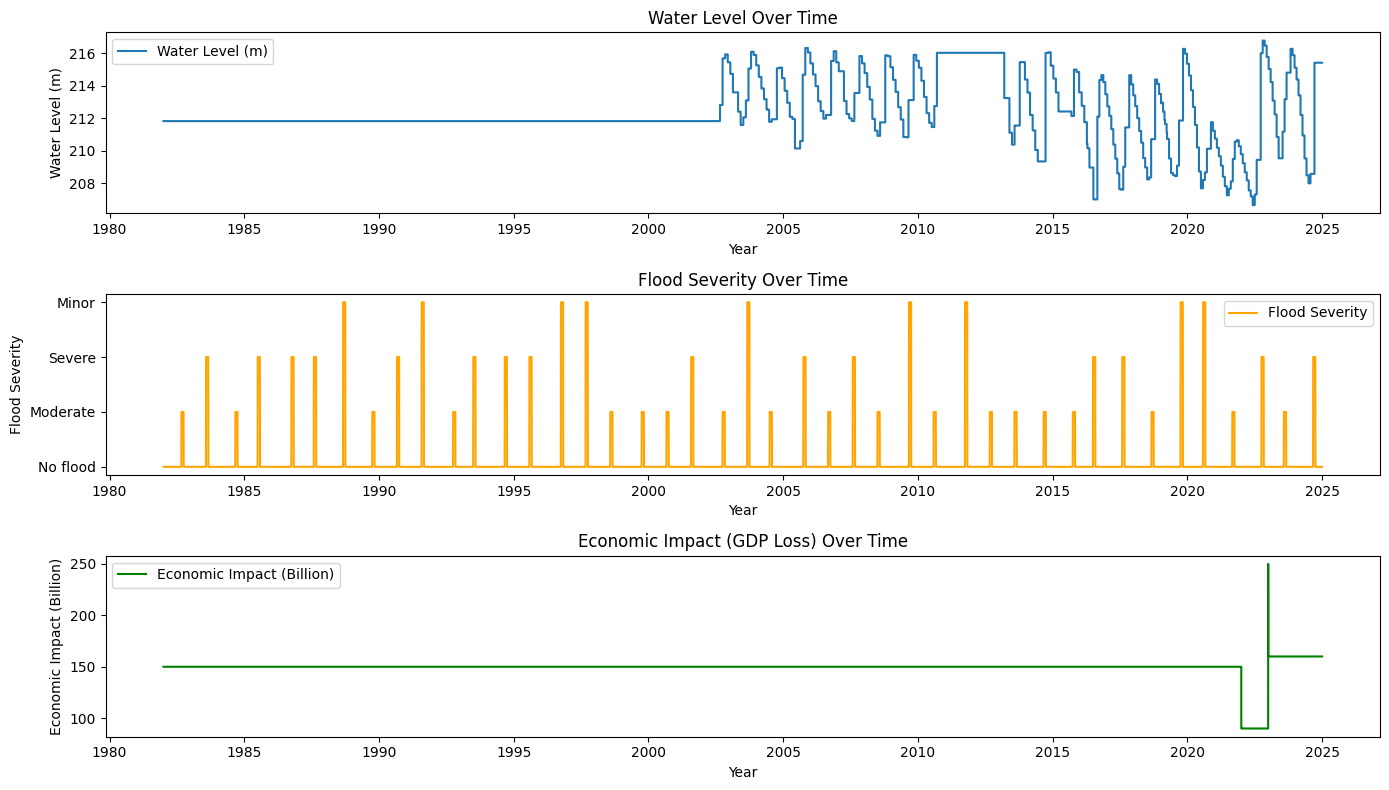

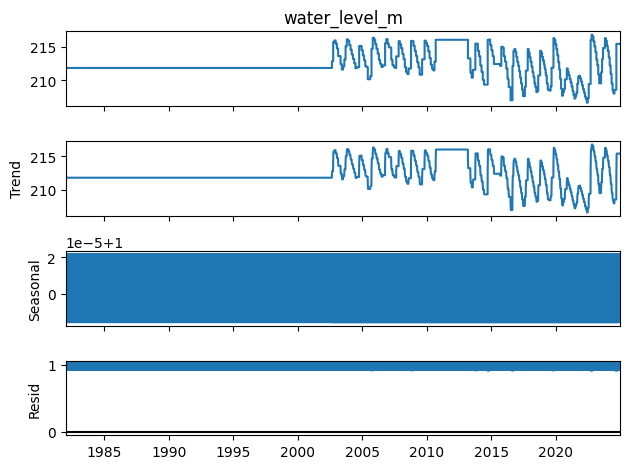

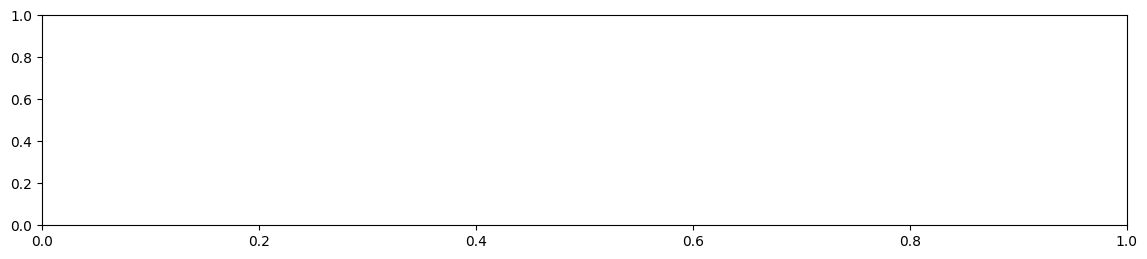

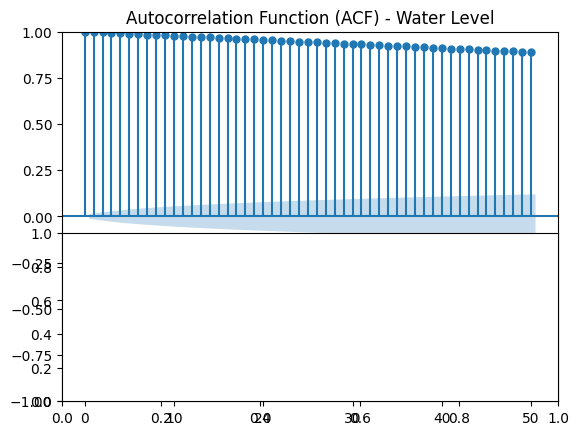

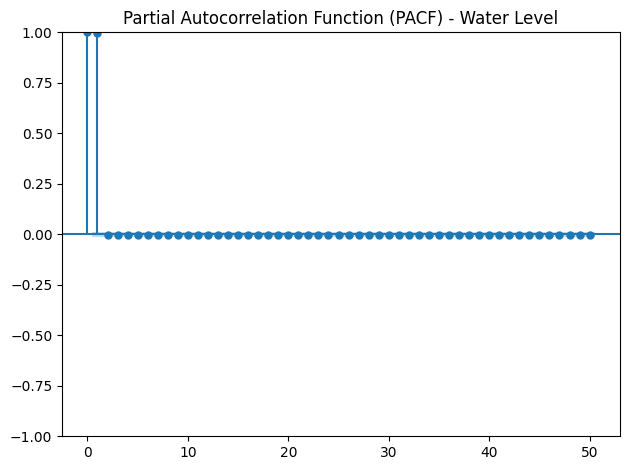

/Users/matthewoladiran/Downloads/LagdoDam/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/matthewoladiran/Downloads/LagdoDam/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.82237D-01    |proj g|=  2.10058D+00


 This problem is unconstrained.



At iterate    5    f= -4.51275D-01    |proj g|=  2.74184D-01

At iterate   10    f= -4.63485D-01    |proj g|=  1.45255D-01

At iterate   15    f= -4.89489D-01    |proj g|=  7.68862D-01

At iterate   20    f= -5.09086D-01    |proj g|=  4.44773D-03

At iterate   25    f= -5.11703D-01    |proj g|=  2.01372D-02

At iterate   30    f= -5.11987D-01    |proj g|=  4.24234D-03

At iterate   35    f= -5.12010D-01    |proj g|=  1.71952D-02

At iterate   40    f= -5.12017D-01    |proj g|=  2.90306D-03

At iterate   45    f= -5.12018D-01    |proj g|=  2.11676D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     68   

/Users/matthewoladiran/Downloads/LagdoDam/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/matthewoladiran/Downloads/LagdoDam/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/kf/wkrwcdhs72s1t4_qg7y9dqwr0000gn/T/ipykernel_35877/811896319.py:66: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1], periods=12, freq='M')


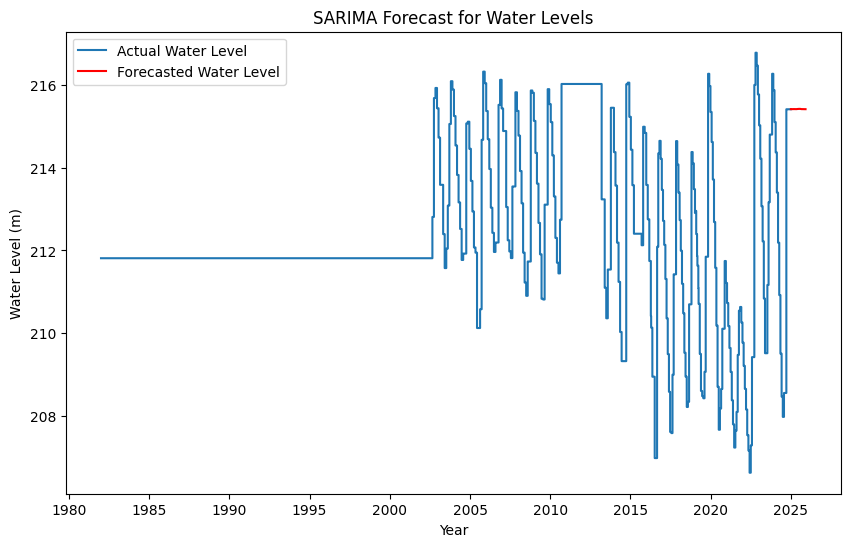

Mean Absolute Error: 0.0042989623028309625
Mean Squared Error: 2.3943887560283608e-05


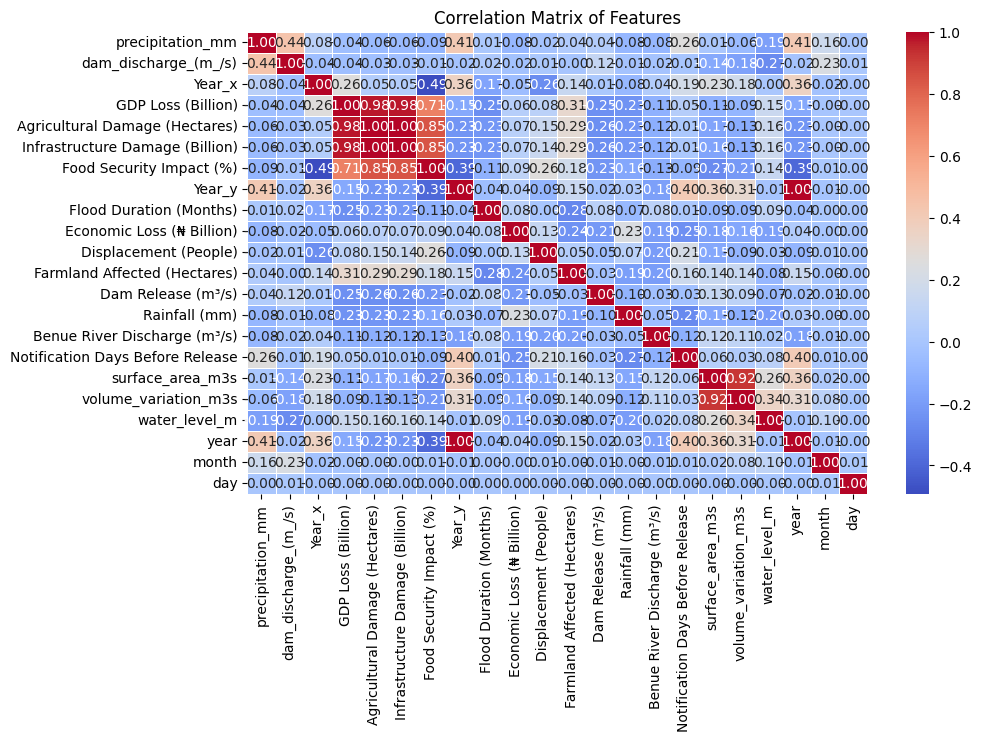

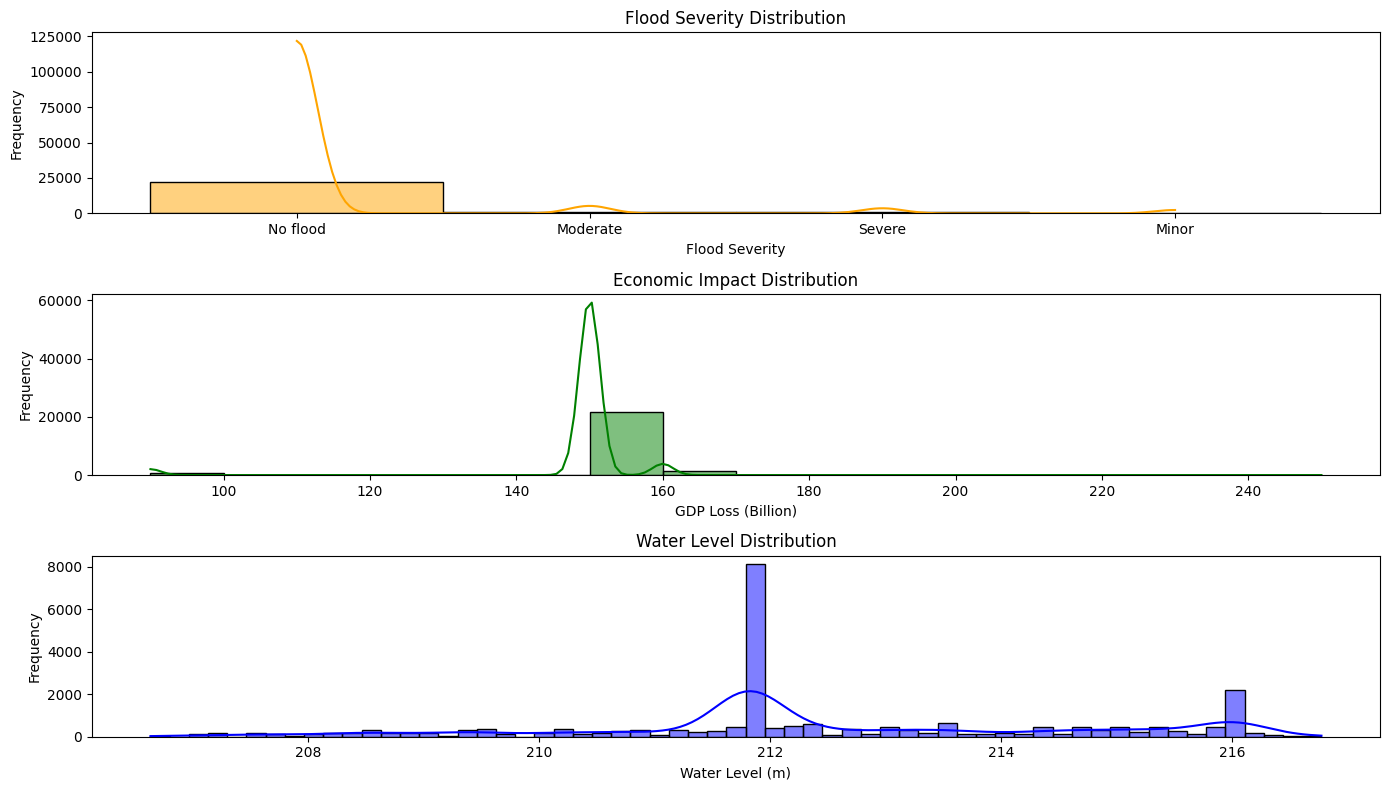

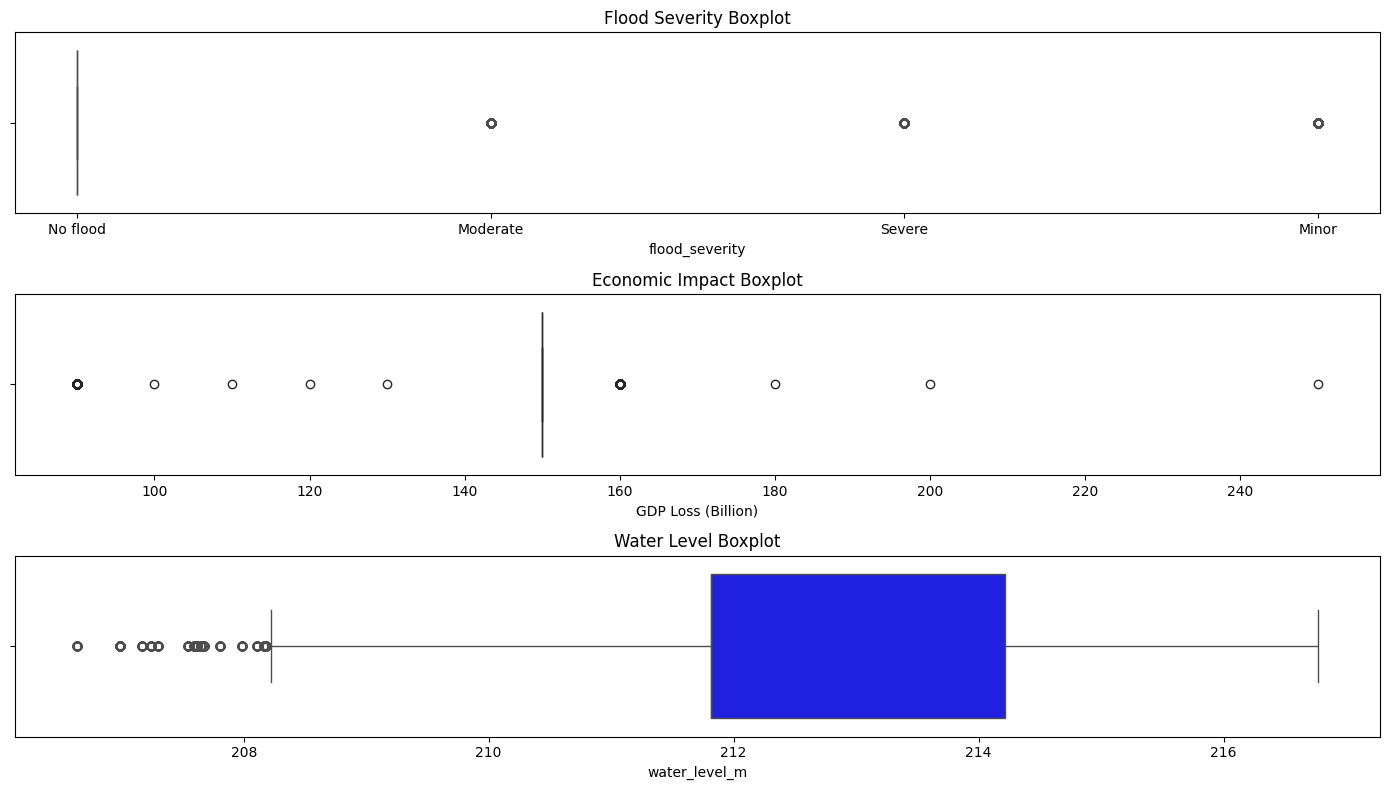

In [12]:
# Fill missing values (imputation or forward fill)
data.ffill(inplace=True)  # Forward fill missing values

# Visualize the trend of water levels, flood severity, and economic impact
plt.figure(figsize=(14, 8))

# Plotting water level over time
plt.subplot(3, 1, 1)
plt.plot(data.index, data['water_level_m'], label='Water Level (m)')
plt.title('Water Level Over Time')
plt.xlabel('Year')
plt.ylabel('Water Level (m)')
plt.legend()

# Plotting flood severity over time
plt.subplot(3, 1, 2)
plt.plot(data.index, data['flood_severity'], label='Flood Severity', color='orange')
plt.title('Flood Severity Over Time')
plt.xlabel('Year')
plt.ylabel('Flood Severity')
plt.legend()

# Plotting GDP Loss (Economic Impact) over time
plt.subplot(3, 1, 3)
plt.plot(data.index, data['GDP Loss (Billion)'], label='Economic Impact (Billion)', color='green')
plt.title('Economic Impact (GDP Loss) Over Time')
plt.xlabel('Year')
plt.ylabel('Economic Impact (Billion)')
plt.legend()

plt.tight_layout()
plt.show()

# Time Series Decomposition of Water Level (SARIMA)
# Decompose water level time series to check trends, seasonality, and residuals
decomposition = seasonal_decompose(data['water_level_m'], model='multiplicative', period=12)  # Set period for monthly data
decomposition.plot()
plt.show()

# Plot ACF and PACF for Water Levels to check for correlation and stationarity
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plot_acf(data['water_level_m'], lags=50)
plt.title('Autocorrelation Function (ACF) - Water Level')

plt.subplot(2, 1, 2)
plot_pacf(data['water_level_m'], lags=50)
plt.title('Partial Autocorrelation Function (PACF) - Water Level')

plt.tight_layout()
plt.show()

# Build SARIMA model for Water Levels (after stationarity tests and parameter tuning)
# Here we assume the series is already stationary or transformed for stationarity

# Example SARIMA model
sarima_model = SARIMAX(data['water_level_m'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # (p,d,q) and seasonal (P,D,Q,s)
sarima_results = sarima_model.fit()

# Summary of SARIMA model
print(sarima_results.summary())

# Plot the forecast
forecast = sarima_results.get_forecast(steps=12)
forecast_index = pd.date_range(data.index[-1], periods=12, freq='M')

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['water_level_m'], label='Actual Water Level')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Water Level', color='red')
plt.title('SARIMA Forecast for Water Levels')
plt.xlabel('Year')
plt.ylabel('Water Level (m)')
plt.legend()
plt.show()

# Evaluate the model (on test data, assuming split into train/test before)
y_true = data['water_level_m'][-12:]  # Actual water levels (last 12 months)
y_pred = forecast.predicted_mean  # Predicted water levels

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

## Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Distribution of Key Variables (Flood Severity, GDP Loss, Water Level)
plt.figure(figsize=(14, 8))

# Flood Severity Distribution
plt.subplot(3, 1, 1)
sns.histplot(data['flood_severity'], kde=True, color='orange')
plt.title('Flood Severity Distribution')
plt.xlabel('Flood Severity')
plt.ylabel('Frequency')

# Economic Impact Distribution
plt.subplot(3, 1, 2)
sns.histplot(data['GDP Loss (Billion)'], kde=True, color='green')
plt.title('Economic Impact Distribution')
plt.xlabel('GDP Loss (Billion)')
plt.ylabel('Frequency')

# Water Level Distribution
plt.subplot(3, 1, 3)
sns.histplot(data['water_level_m'], kde=True, color='blue')
plt.title('Water Level Distribution')
plt.xlabel('Water Level (m)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(14, 8))

# Boxplot for Flood Severity
plt.subplot(3, 1, 1)
sns.boxplot(x=data['flood_severity'], color='orange')
plt.title('Flood Severity Boxplot')

# Boxplot for GDP Loss
plt.subplot(3, 1, 2)
sns.boxplot(x=data['GDP Loss (Billion)'], color='green')
plt.title('Economic Impact Boxplot')

# Boxplot for Water Level
plt.subplot(3, 1, 3)
sns.boxplot(x=data['water_level_m'], color='blue')
plt.title('Water Level Boxplot')

plt.tight_layout()
plt.show()